In [2]:
import os
import pandas as pd
import numpy as np
#from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [3]:
#Setting path
path = 'D:\\Masters\\NDSU\\Spring 2019\\Artificial Intelligence\\Churn-Reduction\\Churn Reduction'
os.chdir(path)

In [4]:
#loading train and test data
df_train = pd.read_csv("Train_data.csv")
df_test = pd.read_csv("Test_data.csv")

In [5]:
#missing value analysis
#storing number of missing values of each variable in dataframe
missing_train = pd.DataFrame(df_train.isnull().sum())
missing_test = pd.DataFrame(df_test.isnull().sum())

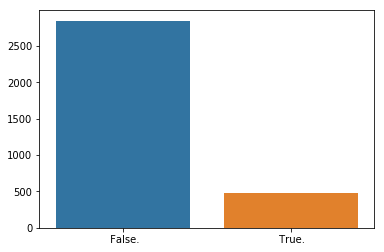

In [6]:
#distribution of target variable
y = df_train["Churn"].value_counts()
sns.barplot(y.index, y.values)

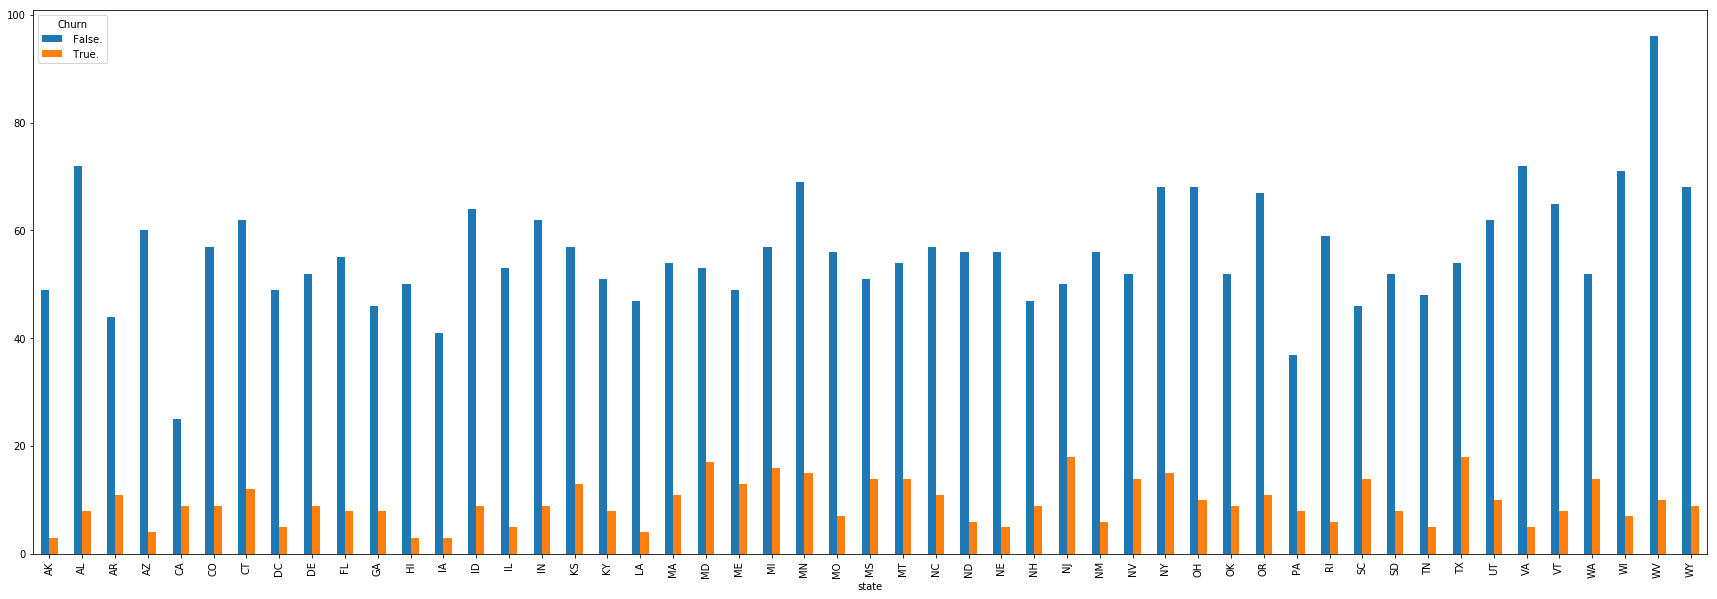

In [7]:
#target variable w r t categorical variable
#state vs churn
df_train.groupby(["state", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(30,10))

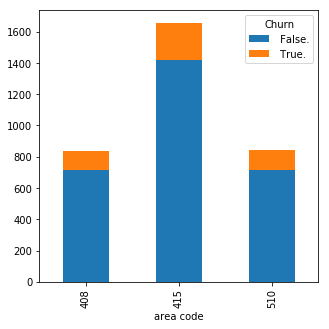

In [8]:
#areacode vs churn
df_train.groupby(["area code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

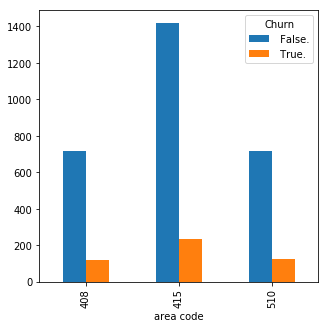

In [9]:
#areacode vs churn
df_train.groupby(["area code", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5))

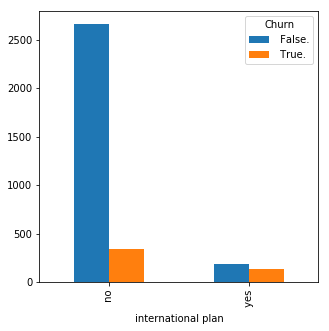

In [10]:
#international plan vs churn
df_train.groupby(["international plan", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5))

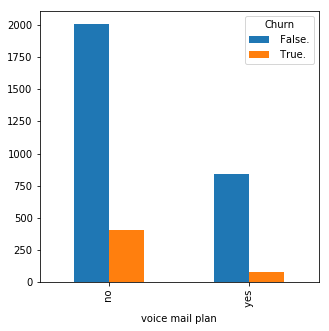

In [11]:
#voice mail plan vs churn
df_train.groupby(["voice mail plan", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5))

In [12]:
#describing train data
df_train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
#assigning levels to categorical varibales
for i in range(0, df_train.shape[1]):
    if(df_train.iloc[:,i].dtypes == 'object'):
        df_train.iloc[:,i] = pd.Categorical(df_train.iloc[:,i])
        df_train.iloc[:,i] = df_train.iloc[:,i].cat.codes
        
for i in range(0, df_test.shape[1]):
    if(df_test.iloc[:,i].dtypes == 'object'):
        df_test.iloc[:,i] = pd.Categorical(df_test.iloc[:,i])
        df_test.iloc[:,i] = df_test.iloc[:,i].cat.codes

In [14]:
df_test.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,11,101,510,451,0,0,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,26,137,510,905,0,0,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,35,103,408,1467,0,1,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,32,99,415,1601,0,0,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,40,108,415,1501,0,0,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0
5,12,117,415,792,0,0,0,226.5,85,38.51,...,68,12.04,223.0,90,10.04,6.9,5,1.86,1,0
6,28,63,415,346,0,1,32,218.9,124,37.21,...,125,18.22,260.3,120,11.71,12.9,3,3.48,1,0
7,18,94,408,535,0,0,0,157.5,97,26.78,...,112,19.08,310.8,106,13.99,11.1,6,3.00,0,0
8,24,138,510,429,0,0,0,89.1,117,15.15,...,46,10.78,190.5,71,8.57,9.9,4,2.67,2,0
9,43,128,415,1311,0,1,43,177.8,100,30.23,...,89,12.52,194.2,92,8.74,11.9,1,3.21,0,0


In [15]:
#storing target variable
train_targets = df_train.Churn
test_targets = df_test.Churn

In [16]:
#combining train and test data for data prepocessing
combined = df_train.append(df_test)

In [17]:
print(combined.shape, df_train.shape, df_test.shape)

(5000, 21) (3333, 21) (1667, 21)


In [18]:

cnames = ["account length","area code","number vmail messages","total day minutes","total day calls","total day charge",
           "total eve minutes","total eve calls","total eve charge","total night minutes","total night calls",
           "total night charge","total intl minutes","total intl calls", "total intl charge", 
           "number customer service calls"]


In [19]:
df_corr = combined.loc[:,cnames]

In [20]:
print(df_corr)

      account length  area code  number vmail messages  total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
5                118        510                      0              223.4   
6                121        510                     24              218.2   
7                147        415                      0              157.0   
8                117        408                      0              184.5   
9                141        415                     37              258.6   
10                65        415                      0              129.1   
11                74        415                      0              187.7   

In [21]:
print(cnames)

['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'number customer service calls']


In [22]:
print(combined)

      state  account length  area code  phone number  international plan  \
0        16             128        415          1926                   0   
1        35             107        415          1575                   0   
2        31             137        415          1117                   0   
3        35              84        408          1707                   1   
4        36              75        415           110                   1   
5         1             118        510          2253                   1   
6        19             121        510          1047                   0   
7        24             147        415            80                   1   
8        18             117        408           291                   0   
9        49             141        415           117                   1   
10       15              65        415            70                   0   
11       39              74        415           620                   0   
12       12 

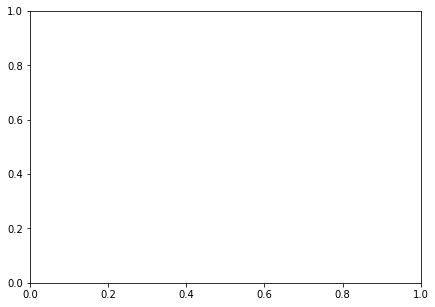

In [23]:
#correlation analysis
#set height and width of plot
f , ax = plt.subplots(figsize = (7,5))

In [24]:
#generate correlation matrix
corr = df_corr.corr()

In [25]:
#plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),
           square = True, ax=ax)


In [26]:
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),
           square = True, ax=ax)

In [27]:
cat_names = ["state","phone number","international plan","voice mail plan","Churn"]


In [28]:
#dropping unnecessary variables
combined = combined.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes",
                    "phone number","Churn"], axis = 1)


In [29]:

combined.shape

(5000, 15)

In [30]:
cnames = ["account length","area code","number vmail messages","total day calls","total day charge",
           "total eve calls","total eve charge","total night calls","total night charge","total intl calls", 
          "total intl charge", "number customer service calls"]


In [31]:
#normalization
for i in cnames:
    print(i)
    combined[i] = (combined[i]-min(combined[i]))/(max(combined[i])-min(combined[i]))


account length
area code
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


In [32]:
print(combined)

      state  account length  area code  international plan  voice mail plan  \
0        16        0.524793   0.068627                   0                1   
1        35        0.438017   0.068627                   0                1   
2        31        0.561983   0.068627                   0                0   
3        35        0.342975   0.000000                   1                0   
4        36        0.305785   0.068627                   1                0   
5         1        0.483471   1.000000                   1                0   
6        19        0.495868   1.000000                   0                1   
7        24        0.603306   0.068627                   1                0   
8        18        0.479339   0.000000                   0                0   
9        49        0.578512   0.068627                   1                1   
10       15        0.264463   0.068627                   0                0   
11       39        0.301653   0.068627              

In [33]:
combined.head(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls
0,16,0.524793,0.068627,0,1,0.480769,0.666667,0.754183,0.582353,0.542866,0.520000,0.619584,0.15,0.500000,0.111111
1,35,0.438017,0.068627,0,1,0.500000,0.745455,0.459672,0.605882,0.537690,0.588571,0.644344,0.15,0.685185,0.111111
2,31,0.561983,0.068627,0,0,0.000000,0.690909,0.692436,0.647059,0.333225,0.594286,0.411930,0.25,0.609259,0.000000
3,35,0.342975,0.000000,1,0,0.000000,0.430303,0.851740,0.517647,0.170171,0.508571,0.498593,0.35,0.329630,0.222222
4,36,0.305785,0.068627,1,0,0.000000,0.684848,0.474230,0.717647,0.407959,0.691429,0.473270,0.15,0.505556,0.333333
5,1,0.483471,1.000000,1,0,0.000000,0.593939,0.635542,0.594118,0.606600,0.674286,0.516601,0.30,0.314815,0.000000
6,19,0.495868,1.000000,0,1,0.461538,0.533333,0.620649,0.635294,0.958266,0.674286,0.538548,0.35,0.375926,0.333333
7,24,0.603306,0.068627,1,0,0.000000,0.478788,0.446620,0.552941,0.283403,0.548571,0.536297,0.30,0.355556,0.000000
8,18,0.479339,0.000000,0,0,0.000000,0.587879,0.524933,0.470588,0.967001,0.514286,0.546427,0.20,0.435185,0.111111
9,49,0.578512,0.068627,1,1,0.711538,0.509091,0.735609,0.652941,0.610482,0.554286,0.826674,0.25,0.559259,0.000000


In [34]:
combined.shape


(5000, 15)

In [90]:
#loading libraries for model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [91]:
#splitting combined data to train and test

train = combined[:3333]
test = combined[3333:]

In [92]:
#decision tree model
c50_model = tree.DecisionTreeClassifier(criterion = 'entropy').fit(train, train_targets)

In [93]:
c50_pred = c50_model.predict(test)


In [94]:
c50_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [95]:
print(c50_pred)

[0 0 0 ... 0 0 0]


In [96]:
#dot file to look at decision tree
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(c50_model, out_file=dotfile, feature_names = train.columns)

In [97]:
#dot file to look at decision tree
dotfile = open("point.dot", 'w')
df = tree.export_graphviz(c50_model, out_file=dotfile, feature_names = train.columns)

In [98]:
#testing accuracy of model
from sklearn.metrics import confusion_matrix

In [99]:
CM = pd.crosstab(test_targets, c50_pred)

In [100]:
CM

col_0,0,1
Churn,,
0,1374,69
1,70,154


In [101]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [103]:
print("Decision Tree accuracy:")
accuracy_score(test_targets,c50_pred)*100

Decision Tree accuracy:


91.66166766646671

In [104]:
#random forest model

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100).fit(train,train_targets)

RF_prediction = RF_model.predict(test)


In [105]:
RF_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [106]:
CM = pd.crosstab(test_targets, RF_prediction)
CM

col_0,0,1
Churn,,
0,1440,3
1,72,152


In [107]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [108]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print("Random Forest accuracy:")
print(((TP+TN)*100)/(TP+TN+FP+FN))

Random Forest accuracy:
95.500899820036


In [71]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

In [72]:
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(train, train_targets)


In [73]:
#predict test cases
KNN_Predictions = KNN_model.predict(test)


In [74]:
CM = pd.crosstab(test_targets, KNN_Predictions)
CM

col_0,0,1
Churn,,
0,1438,5
1,218,6


In [75]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [76]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print("KNN accuracy")
print(((TP+TN)*100)/(TP+TN+FP+FN))

KNN accuracy
86.62267546490702


In [77]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB


In [78]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(train, train_targets)



In [79]:
#predict test cases
NB_Predictions = NB_model.predict(test)


In [80]:
#Build confusion matrix
CM = pd.crosstab(test_targets, NB_Predictions)
CM


col_0,0,1
Churn,,
0,1342,101
1,135,89


In [81]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [82]:
#check accuracy of model
#accuracy_score(Y_test, y_pred)*100
print("Naive Bayes accuracy:")
print(((TP+TN)*100)/(TP+TN+FP+FN))

Naive Bayes accuracy:
85.84283143371326


In [83]:
#we will be fixing random forest model as it provides best results
#now we will generate example out for out sample input test data with Random forest predictions 

move = pd.DataFrame(RF_prediction)

move = move.rename(columns = {0:'move'})


In [84]:
test = test.join(move['move'])


In [85]:

test.to_csv("model_output.csv", index = False)


In [86]:
df_prediction = pd.read_csv("model_output.csv")

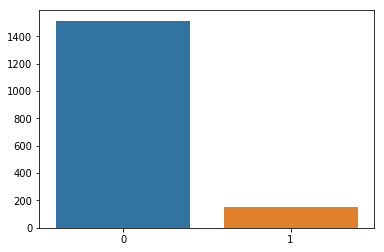

In [87]:
#distribution of target variable
y = df_prediction["move"].value_counts()
sns.barplot(y.index, y.values)


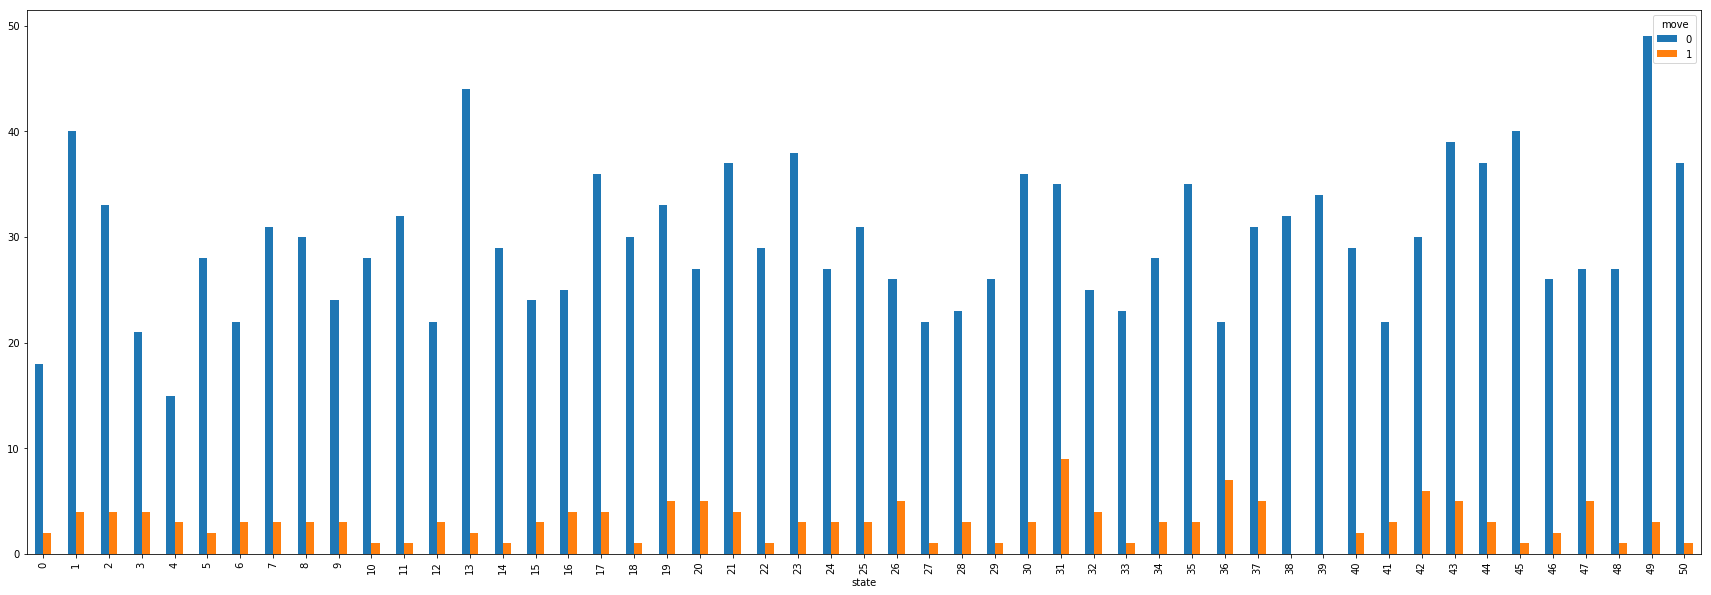

In [88]:
#state vs churn
df_prediction.groupby(["state", "move"]).size().unstack().plot(kind='bar', stacked=False, figsize=(30,10))


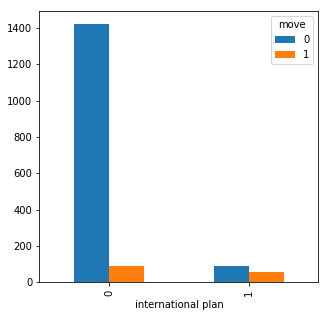

In [89]:
#international plan vs churn
df_prediction.groupby(["international plan", "move"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5))
